In [1]:
from nn import NeuralNetwork
from nn import preprocess
from nn import io
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
#Read in positive seqs and negative seqs and create labels for them (1 = TF, 0 = not TF)
pos_X = io.read_text_file('./data/rap1-lieb-positives.txt') #17bp
pos_y = [1] * len(pos_X)
neg_X_raw = io.read_fasta_file('./data/yeast-upstream-1k-negative.fa') #1000bp
neg_X = []
for seq in neg_X_raw:
    neg_len = int((len(seq)-1)/3)
    for idx in range(neg_len):
        idx = idx * 3
        snip = seq[idx:idx+17]
        if len(snip) == 17:
            neg_X.append(snip)
        snip = seq[idx+1:idx+18]
        if len(snip) == 17:
            neg_X.append(snip)
        snip = seq[idx+2:idx+19]
        if len(snip) == 17:
            neg_X.append(snip)
neg_y = [0] * len(neg_X)

In [4]:
#Resample the data and one hot encode it to prepare the data for NN training
#Split into test and train supsets
sampled_seqs_pre, sampled_labels = preprocess.sample_seqs(pos_X, neg_X, pos_y, neg_y)
sampled_seqs = preprocess.one_hot_encode_seqs(sampled_seqs_pre)
X_train, X_test, y_train, y_test = train_test_split(sampled_seqs, sampled_labels,
                                                            test_size=0.15, random_state=42)

In [5]:
#Initialize the NN
lr=.0002
seed=1
batch_size=2
epochs=15
nn = NeuralNetwork([{'input_dim': 68, 'output_dim': 16, 'activation': 'sigmoid'},
                    {'input_dim': 16, 'output_dim': 1, 'activation': 'sigmoid'}],
                   lr, seed, batch_size, epochs, 'mean squared error')

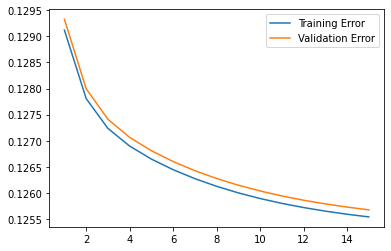

0.1264483552778626
0.12660479814974573


In [6]:
#Fit the model and print errors
train_error, validation_error = nn.fit(X_train, y_train, X_test, y_test)
print(np.mean(train_error))
print(np.mean(validation_error))